### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import math

### Create Dataset 

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
X, y = make_blobs(n_samples=10000,n_features=2,centers=2, cluster_std=1.5,random_state=20)

### Vizualize the Dataset 

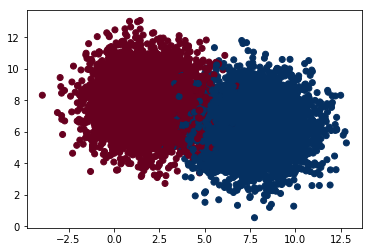

In [4]:
plt.scatter(X[:,0],X[:,1],marker='o',c=y,cmap='RdBu')

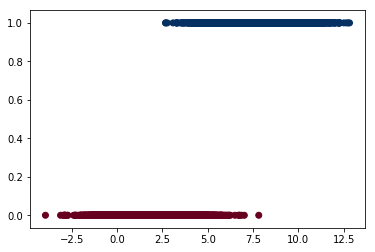

In [5]:
plt.scatter(X[:,0],y,marker='o',c=y,cmap='RdBu')

#### Checking the sigmoid function 

In [6]:
sx = list(range(-10,10))

In [7]:
sy = [1/(1+np.exp(-i)) for i in sx]

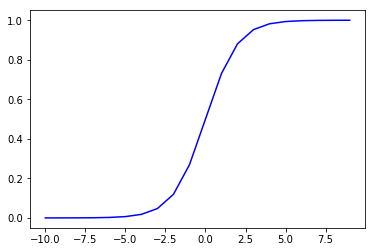

In [8]:
plt.plot(sx,sy,c='blue')
plt.show()

### Making the Model

In [9]:
def propagate(X,Y,w,b):
    m= X.shape[1]
    z = np.dot(w.T,X) + b
    A = 1/(1+np.exp(-z))
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw = (1/m) * np.dot(X,(A-Y).T)
    db = (1/m) * np.sum(A-Y)
    grads = {"dw":dw,"db":db}
    return grads,cost

In [10]:
def initialize(dim):    
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [11]:
def optimize(X,y,w,b,learning_rate,num_iteration):
    m = X.shape[1]
    costs = []
    for i in range(num_iteration):
        grads, cost = propagate(X,y,w,b)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        if(i%10==0):
            costs.append(cost)
    params = {"w":w,"b":b}
    return params, grads, costs

In [12]:
def predict(X,w,b):
    m = X.shape[1]
    predictions = np.zeros((1,m))
    z = np.dot(w.T,X) + b
    A = 1/(1+np.exp(-z))
    for i in range(m):
        predictions[0,i] = 1 if A[0,i] > 0.5 else 0
    return predictions

In [23]:
def model(X,y):
    X = X.T
    w, b = initialize(X.shape[0])
    learning_rate = 0.1
    num_iterations = 2000
    params,grads,costs = optimize(X,y,w,b,learning_rate,num_iterations)
    w = params["w"]
    b = params["b"]
    predictions = predict(X,w,b)
    return predictions

In [ ]:
predictions = model(X,y)

In [ ]:
accuracy = (100-np.mean(np.abs(y-predictions))*100)

In [21]:
print("Accuracy of the model is: " + str(accuracy) + "%.")

Accuracy of the model is: 97.65%.


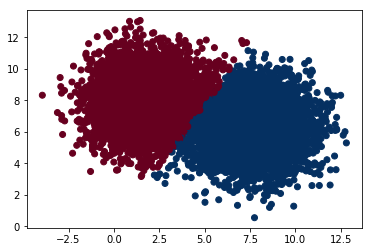

In [22]:
plt.scatter(X[:,0],X[:,1],c=predictions,cmap='RdBu')
plt.show()